# **Project 3**, APS1070 Summer 2021
# **PCA**


We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1 to 3**.
* The second Covid-19 dataset reports the total number of death for each country at the end of each day. We use this dataset in **Part 4 and 5**. 
* Finally, we will apply PCA to images using the Fashion-MNIST dataset of fashion clothes in **Part 6**.

# Part 1: Getting started [2 Marks]

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.dates as mdates
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/confirmed-june21.csv',
    index_col=0,
    thousands=','
)
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2021-05-07,2021-05-08,2021-05-09,2021-05-10,2021-05-11,2021-05-12,2021-05-13,2021-05-14,2021-05-15,2021-05-16,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29,2021-05-30,2021-05-31,2021-06-01,2021-06-02,2021-06-03,2021-06-04,2021-06-05,2021-06-06,2021-06-07,2021-06-08,2021-06-09,2021-06-10,2021-06-11,2021-06-12,2021-06-13,2021-06-14,2021-06-15
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111,70761,71838,72977,74026,75119,76628,77963,79224,80841,82326,84050,85892,87716,88740,89861,91458,93272
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297,132309,132315,132337,132351,132360,132372,132374,132379,132384,132397,132415,132426,132437,132449,132459,132461,132469
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456,128725,128913,129218,129640,129976,130361,130681,130958,131283,131647,132034,132355,132727,133070,133388,133742,134115
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693,13693,13727,13729,13744,13752,13758,13758,13758,13777,13781,13791,13805,13813,13813,13813,13826,13828
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180,34366,34551,34752,34960,35140,35307,35594,35772,35854,36004,36115,36325,36455,36600,36705,36790,36921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,3137,3245,3412,3489,3571,3658,3740,3816,4112,4212,4359,4512,4720,4809,4941,5119,5275,5404,5931,6086,6356,6396,6908,7107,7432,7625,7870,8063,8364,8580,8791,9027,9222,9635,9835,10048,10337,10630,10881,11304
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,300946,301437,301751,302249,302777,303270,303270,303270,303658,303827,304074,304074,304532,304532,304968,305201,305201,305777,306334,306795,306795,307569,307838,308048,308350,308732,309036,309333,309644,309853,310026,310026,310544,310544,311018,311018,311018,311534,311690,311948
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6446,6462,6482,6485,6492,6498,6507,6523,6538,6543,6568,6586,6593,6613,6632,6649,6658,6662,6670,6688,6696,6723,6731,6737,6742,6751,6759,6767,6773,6780,6787,6812,

In [ ]:
# 1.1

def rndmfunc(cases_raw1,country_list1):
  dates1=list(cases_raw1.columns)
  dates=np.array(dates1)
  dates=pd.to_datetime(dates,format='%Y-%m-%d')
  import matplotlib.pyplot as plt
  plt.style.use('seaborn')
  plt.plot(dates,cases_raw1.loc[country_list1[0]],label='Afghanistan')
  plt.plot(dates,cases_raw1.loc[country_list1[1]],label='Albania')
  plt.plot(dates,cases_raw1.loc[country_list1[2]],label='Algeria')
  plt.plot(dates,cases_raw1.loc['US'],label='US')
  plt.plot(dates,cases_raw1.loc['China'],label='China')
  plt.plot(dates,cases_raw1.loc['Canada'],label='Canada')
  plt.xticks(rotation=45)
  plt.title('Number of COVID-19 Cases')
  plt.xlabel('Dates')
  plt.ylabel('Number of Cases')
  plt.legend()
#plotting figures together in subplot
  fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3, constrained_layout=False,sharex=False)
  fig.set_figheight(15)
  fig.set_figwidth(25)
  fig.suptitle('Number of COVID-19 Cases', fontsize=25)


  ax1.plot(dates,cases_raw1.loc[country_list1[0]],label='Afghanistan')
  ax1.tick_params(labelrotation=45)
  #ax1.set_title('Number of COVID-19 Cases')
  ax1.set_xlabel('Dates')
  ax1.set_ylabel('Number of Cases')
  ax1.legend()

  ax2.plot(dates,cases_raw1.loc[country_list1[1]],label='Albania')
  ax2.tick_params(labelrotation=45)
  #ax2.set_title('Number of COVID-19 Cases')
  ax2.set_xlabel('Dates')
  ax2.set_ylabel('Number of Cases')
  ax2.legend()


  ax3.plot(dates,cases_raw1.loc[country_list1[2]],label='Algeria')
  ax3.tick_params(labelrotation=45)
  #ax3.set_title('Number of COVID-19 Cases')
  ax3.set_xlabel('Dates')
  ax3.set_ylabel('Number of Cases')
  ax3.legend()


  ax4.plot(dates,cases_raw1.loc['US'],label='US')
  ax4.tick_params(labelrotation=45)
  #ax4.set_title('Number of COVID-19 Cases')
  ax4.set_xlabel('Dates')
  ax4.set_ylabel('Number of Cases')
  ax4.legend()


  ax5.plot(dates,cases_raw1.loc['China'],label='China')
  ax5.tick_params(labelrotation=45)
  #ax5.set_title('Number of COVID-19 Cases')
  ax5.set_xlabel('Dates')
  ax5.set_ylabel('Number of Cases')
  ax5.legend()


  ax6.plot(dates,cases_raw1.loc['Canada'],label='Canada')
  #ax6.set_title('Number of COVID-19 Cases')
  ax6.set_xlabel('Dates')
  #ax6.set_xticks(rotation=45)
  ax6.tick_params(labelrotation=45)
  ax6.set_ylabel('Number of Cases')
  ax6.legend()



In [ ]:
#1.2
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(cases_raw)
cases_raw_scaled1 = scaler.transform(cases_raw)
cases_raw_scaled=pd.DataFrame(cases_raw_scaled1,index=cases_raw.index,columns=cases_raw.columns)

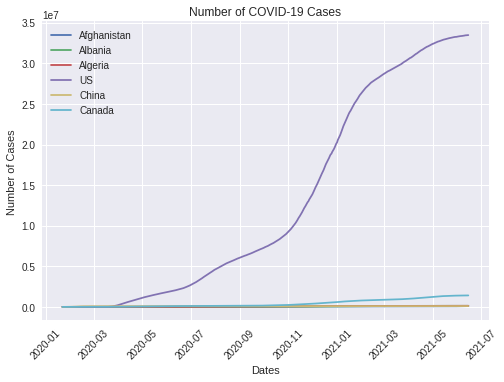

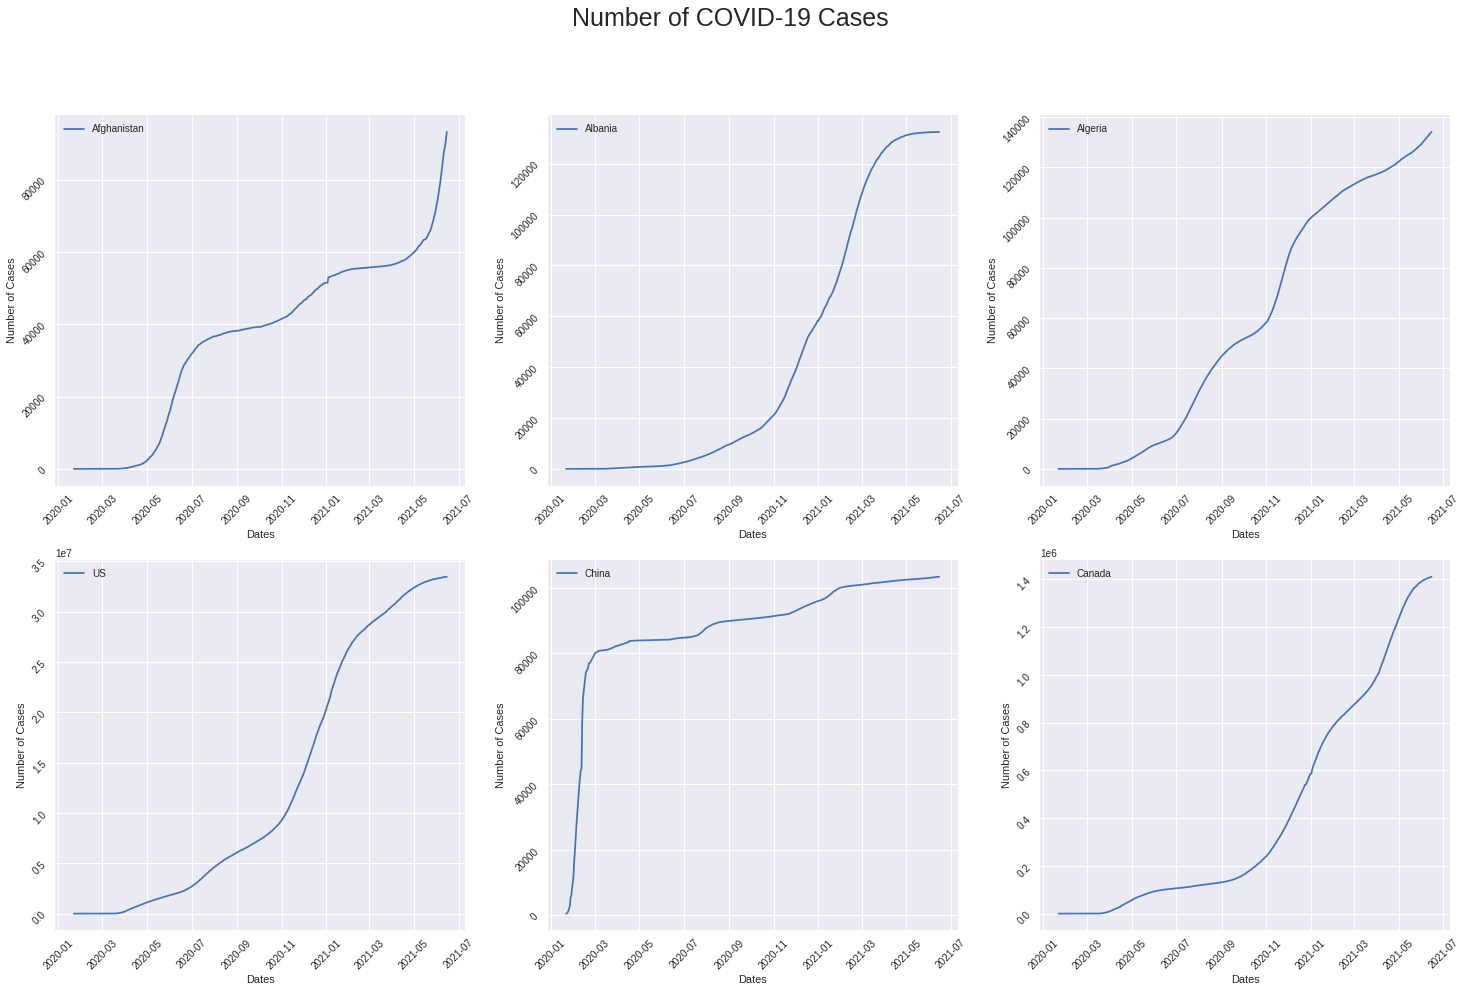

In [ ]:

country_list=list(pd.Series(cases_raw.index))
rndmfunc(cases_raw,country_list)

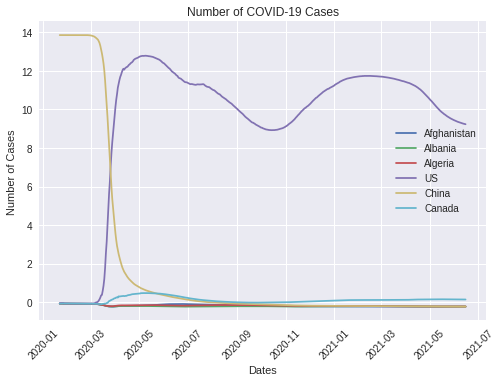

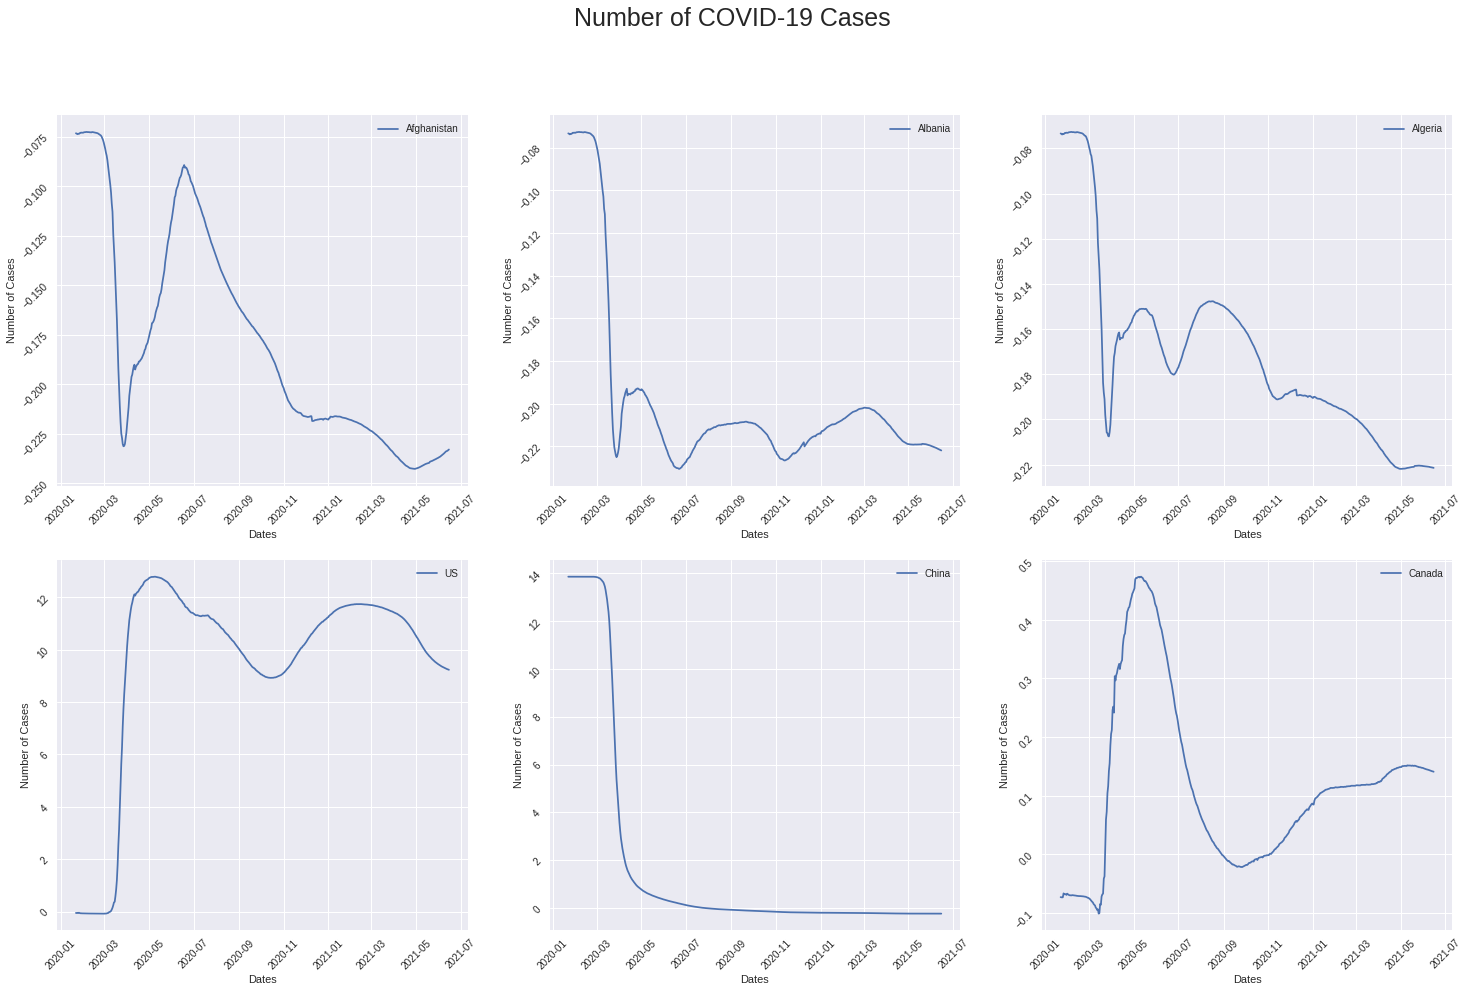

In [ ]:
# STANDARDIZED PLOT 1.3
country_list=list(pd.Series(cases_raw_scaled.index))
rndmfunc(cases_raw_scaled,country_list)


StandardScalar works by subtracting the mean and scaling to unit variance of the original dataset

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the samples and s is the standard deviation of the samples.

The Standardized graph of number of cases for US, Canada and China goes up when the difference between sample and the mean of the sample goes up and vice versa. The negative value of the the standarized data represents the sample points whose values are smaller than the value of mean of samples. Similarly, the positive value of the the standarized data represents the sample points whose values are larger than the value of mean of samples.

It can be observed that the daily cases of USA increased rapidly above the mean cases between March 2020 and June 2020. The daily casesof China did not fluctuated too much after June 2020.


# Part 2: Applying PCA [2 Marks]

In [ ]:
cov=np.cov(cases_raw_scaled.T) #covariance matrix
cov.shape

(511, 511)

In [ ]:
def get_sorted_eigen(df):
  cov1=np.cov(df.T)
  print(cov1)
  eigenValues, eigenVectors = np.linalg.eigh(cov1) 
  #print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)
  args = (-eigenValues).argsort()
  eigenValues = eigenValues[args]
  eigenVectors = eigenVectors[:, args]
  return eigenValues, eigenVectors

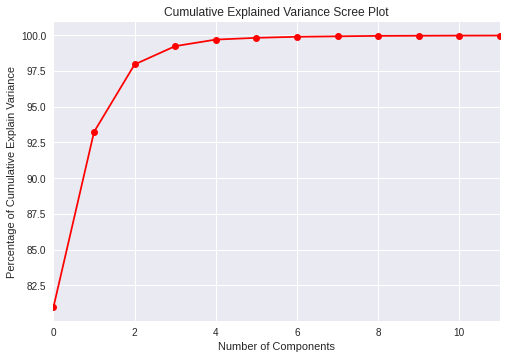

In [ ]:
import matplotlib.pyplot as plt
eigenValues, eigenVectors = np.linalg.eigh(cov) 
#print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar
#plt.bar(range(4), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o')
plt.xlim(right=11)
plt.xlim(left=0)
plt.title('Cumulative Explained Variance Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explain Variance')
#plt.legend()
plt.show()

In [ ]:
count=1
for xx in cumExpVar:
  
  if xx>=99:
    xx1=xx
    break
  count=count+1
print('The number of components needed to cover 99% of variance is',count)



The number of components needed to cover 99% of variance is 4


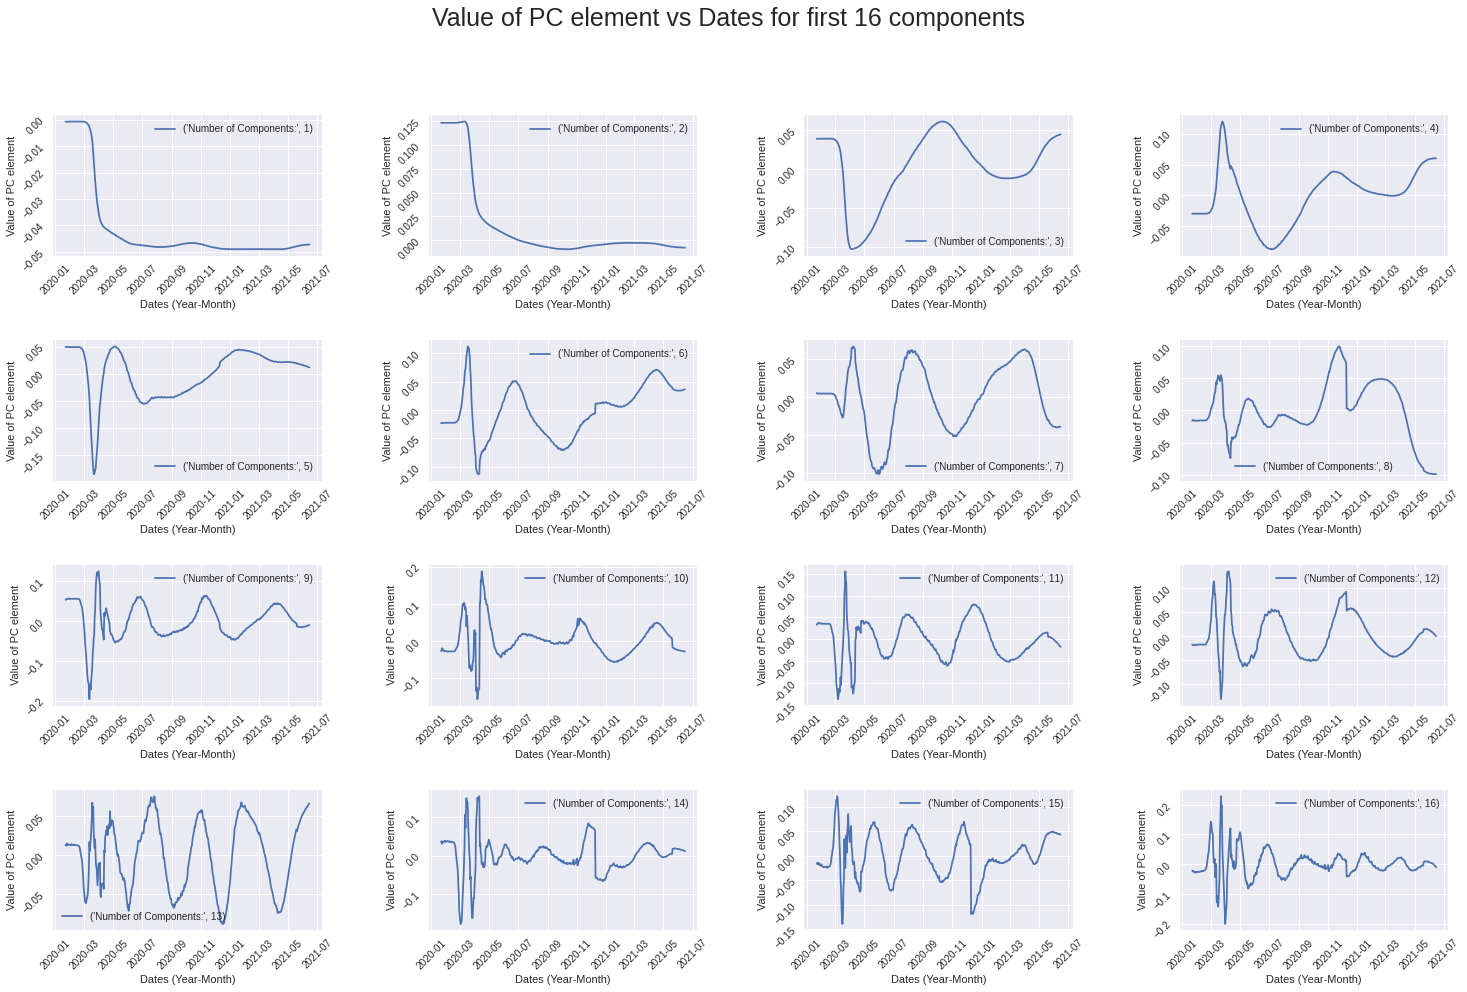

In [ ]:
fig, axs = plt.subplots(4, 4)
fig.set_figheight(15)
fig.set_figwidth(25)
fig.suptitle('Value of PC element vs Dates for first 16 components', fontsize=25)
fig.subplots_adjust(hspace=0.6, wspace=0.4)

dates1=list(cases_raw_scaled.columns)
dates=np.array(dates1)
dates=pd.to_datetime(dates,format='%Y-%m-%d')
c=0
for i in range(4):
    for j in range(4):
      axs[i,j].plot(dates,eigenVectors[:,c],label=('Number of Components:',c+1 ))
      axs[i,j].tick_params(labelrotation=45)
      axs[i,j].set_xlabel('Dates (Year-Month)')
      axs[i,j].set_ylabel('Value of PC element')
      axs[i,j].legend()
      c=c+1


It can be clearly observed that the plot of first few components are different than later components. The value of PC element did not vary much with dates in initial number of components but the fluctuation of the value of PC element increases significantly with increased number of components. 

As the plot of later PC elements are very noisy, they are not suitable for reconstruction. 

# Part 3: Data reconstruction [4.5 Marks]

In [ ]:
def plot_country_figures(original_df, country_name): 
  #original_df=cases_raw
  #country_name='India'
  import matplotlib.pyplot as plt
  fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5)
  fig.set_figheight(25)
  fig.set_figwidth(15)
  fig.subplots_adjust(hspace=0.6, wspace=0.2)
  plt.style.use('seaborn')
  dates1=list(original_df.columns)
  dates=np.array(dates1)
  dates=pd.to_datetime(dates,format='%Y-%m-%d')


  #ax4.style.use('seaborn')
  ax4.plot(dates,original_df.loc[country_name],label=country_name)
  ax4.tick_params(labelrotation=45)
  ax4.set_title('Original time series')
  ax4.set_xlabel('Dates')
  ax4.set_ylabel('Number')
  ax4.legend()
  #plt.show()

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler().fit(original_df)
  original_df_scaled1 = scaler.transform(original_df)
  original_df_scaled=pd.DataFrame(original_df_scaled1,index=original_df.index,columns=original_df.columns)


  #ax5.style.use('seaborn')
  ax5.plot(dates,original_df_scaled.loc[country_name],label=country_name)
  ax5.tick_params(labelrotation=45)
  ax5.set_title('Standardized time series')
  ax5.set_xlabel('Dates')
  ax5.set_ylabel('Number')
  ax5.legend()

  eigenValues, eigenVectors=get_sorted_eigen(original_df_scaled)
  PC_count=[1,2,4,8,16]

  from sklearn.metrics import mean_squared_error
  for n in PC_count:
    
    W = eigenVectors[:, 0:n] #eigenvector 
    projX = np.dot(original_df_scaled, W)
    ReconX = np.dot(projX, W.T) 
    R_scaled=pd.DataFrame(data=ReconX,columns=dates,index=original_df_scaled.index)

    scaler = StandardScaler().fit(cases_raw)
    R_org1 = scaler.inverse_transform(ReconX)
    R_org=pd.DataFrame(R_org1,index=R_scaled.index,columns=R_scaled.columns)


    
    #fig.suptitle('Number of COVID-19 Cases', fontsize=25)
    
    #plt.plot(ReconX)
    ax1.plot(dates,R_org.loc[country_name],label=(n,'componenets'))
    ax1.tick_params(labelrotation=45)
    ax1.set_title('Reconstructed Original time series')
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Reconstructed numbers')
    ax1.legend()

    

    

    residual= R_org-original_df #RESIDUAL ERROR
    residualpd=pd.DataFrame(data=residual,columns=residual.columns,index=residual.index)

    ax2.plot(dates,residualpd.loc[country_name],label=(n,'componenets'))
    ax2.tick_params(labelrotation=45)
    ax2.set_title('Residual Error')
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('Residual Error')
    ax2.legend()

    

    rmse = mean_squared_error(original_df, R_org, squared=False) #RSME
    #rmse= ( (R_org-original_df)^2 )^(0.5)
    #rmsepd=pd.DataFrame(data=rmse,columns=R_org.columns,index=R_org.index)
    ax3.plot(n,rmse,marker="o")
    ax3.tick_params(labelrotation=45)
    ax3.set_title('RMSE')
    ax3.set_xlabel('Number of Componenets')
    ax3.set_ylabel('RMSE')


    
  

[[ 1.00520833  1.00520139  1.00519427 ... -0.015627   -0.01563874
  -0.01565278]
 [ 1.00520139  1.00520833  1.00520147 ... -0.01586662 -0.01587827
  -0.01589214]
 [ 1.00519427  1.00520147  1.00520833 ... -0.01527189 -0.01528431
  -0.01529908]
 ...
 [-0.015627   -0.01586662 -0.01527189 ...  1.00520833  1.00520776
   1.00520501]
 [-0.01563874 -0.01587827 -0.01528431 ...  1.00520776  1.00520833
   1.00520708]
 [-0.01565278 -0.01589214 -0.01529908 ...  1.00520501  1.00520708
   1.00520833]]


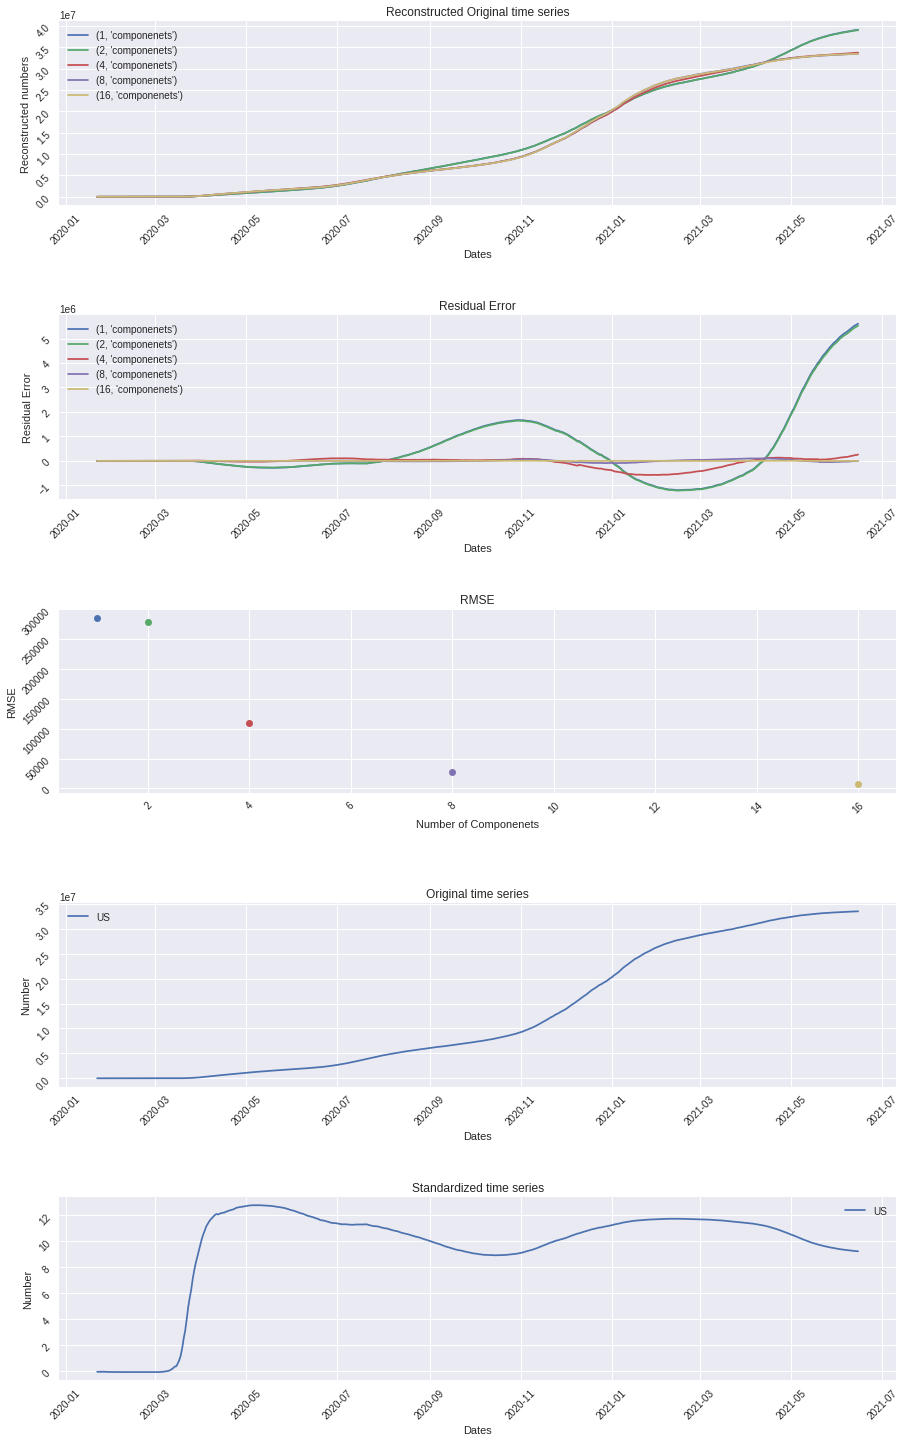

In [ ]:
plot_country_figures(cases_raw, 'US')

[[ 1.00520833  1.00520139  1.00519427 ... -0.015627   -0.01563874
  -0.01565278]
 [ 1.00520139  1.00520833  1.00520147 ... -0.01586662 -0.01587827
  -0.01589214]
 [ 1.00519427  1.00520147  1.00520833 ... -0.01527189 -0.01528431
  -0.01529908]
 ...
 [-0.015627   -0.01586662 -0.01527189 ...  1.00520833  1.00520776
   1.00520501]
 [-0.01563874 -0.01587827 -0.01528431 ...  1.00520776  1.00520833
   1.00520708]
 [-0.01565278 -0.01589214 -0.01529908 ...  1.00520501  1.00520708
   1.00520833]]


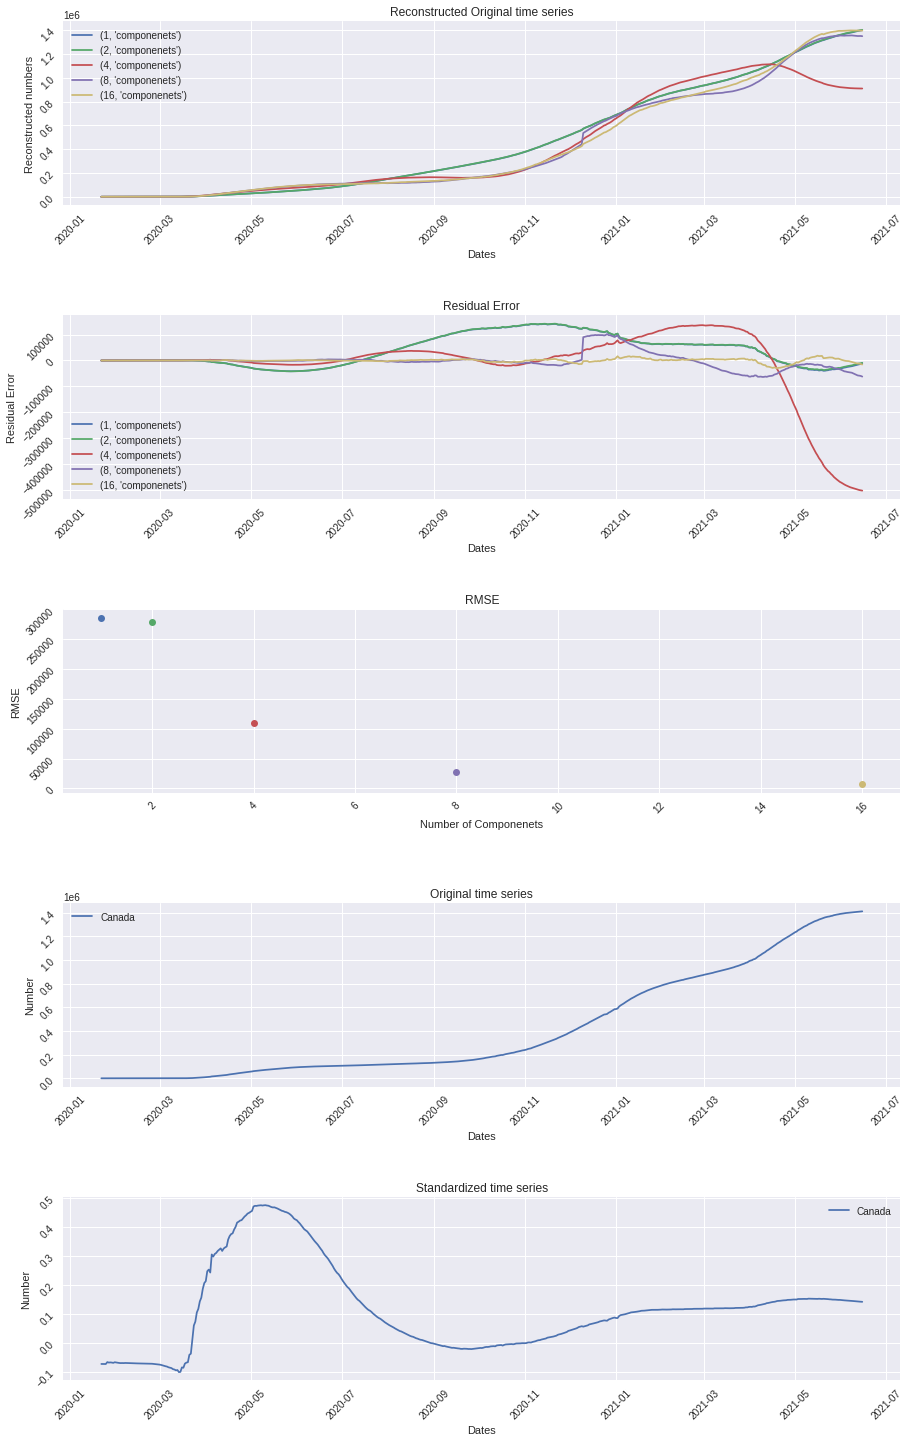

In [ ]:
plot_country_figures(cases_raw, 'Canada')

[[ 1.00520833  1.00520139  1.00519427 ... -0.015627   -0.01563874
  -0.01565278]
 [ 1.00520139  1.00520833  1.00520147 ... -0.01586662 -0.01587827
  -0.01589214]
 [ 1.00519427  1.00520147  1.00520833 ... -0.01527189 -0.01528431
  -0.01529908]
 ...
 [-0.015627   -0.01586662 -0.01527189 ...  1.00520833  1.00520776
   1.00520501]
 [-0.01563874 -0.01587827 -0.01528431 ...  1.00520776  1.00520833
   1.00520708]
 [-0.01565278 -0.01589214 -0.01529908 ...  1.00520501  1.00520708
   1.00520833]]


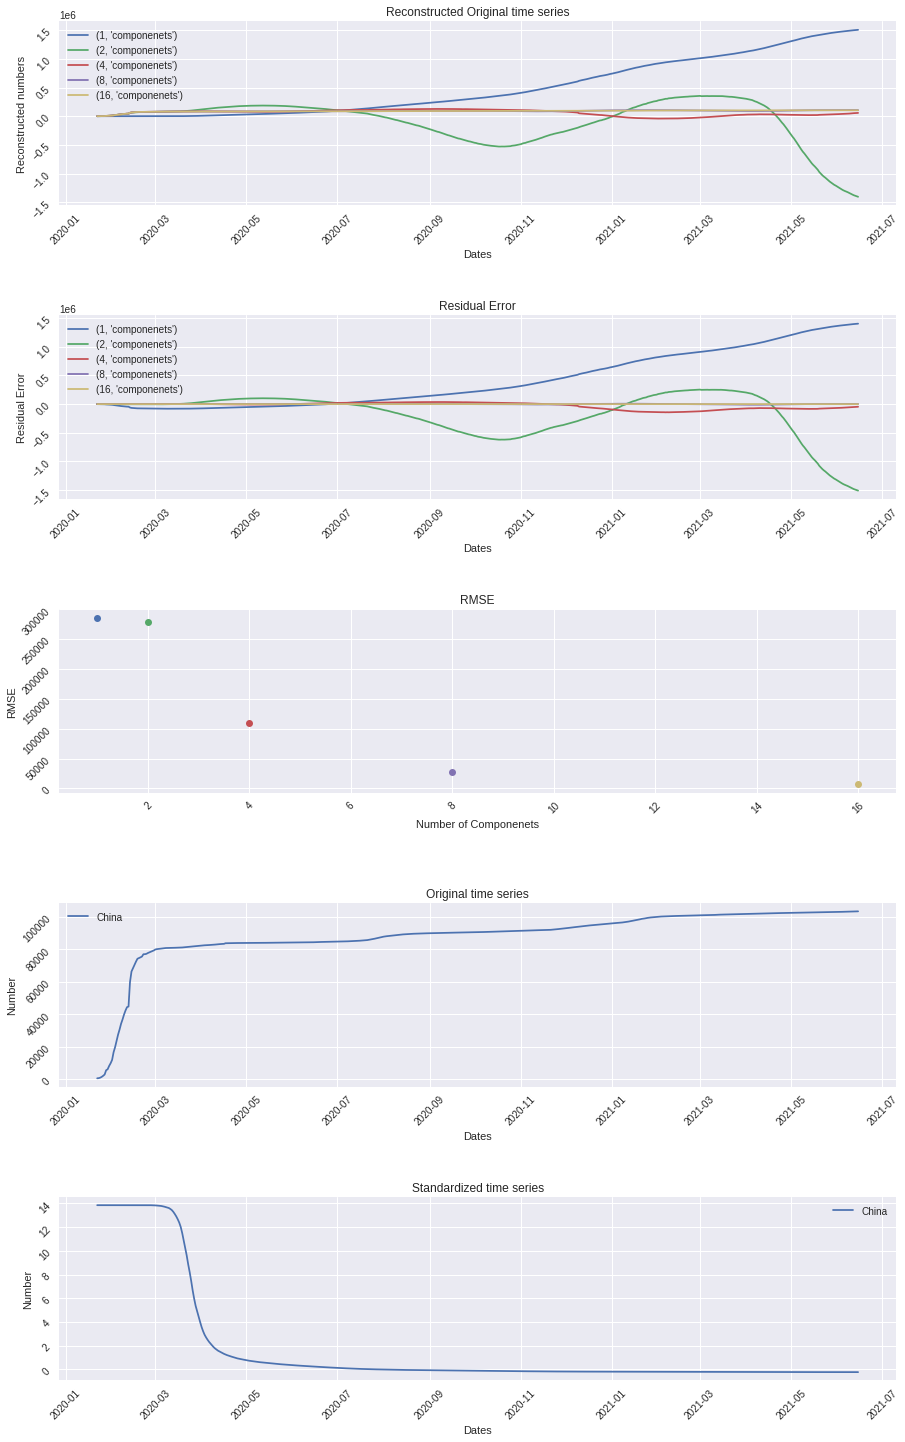

In [ ]:
plot_country_figures(cases_raw, 'China')

# Part 4: Time-series analysis on death cases [1.5 Marks]



In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/death-june21.csv',
    index_col=0,
    thousands=','
)

[[ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 ...
 [-0.01599894 -0.01599894 -0.01599894 ...  1.00520833  1.0052049
   1.0051958 ]
 [-0.01601339 -0.01601339 -0.01601339 ...  1.0052049   1.00520833
   1.00520489]
 [-0.01602546 -0.01602546 -0.01602546 ...  1.0051958   1.00520489
   1.00520833]]


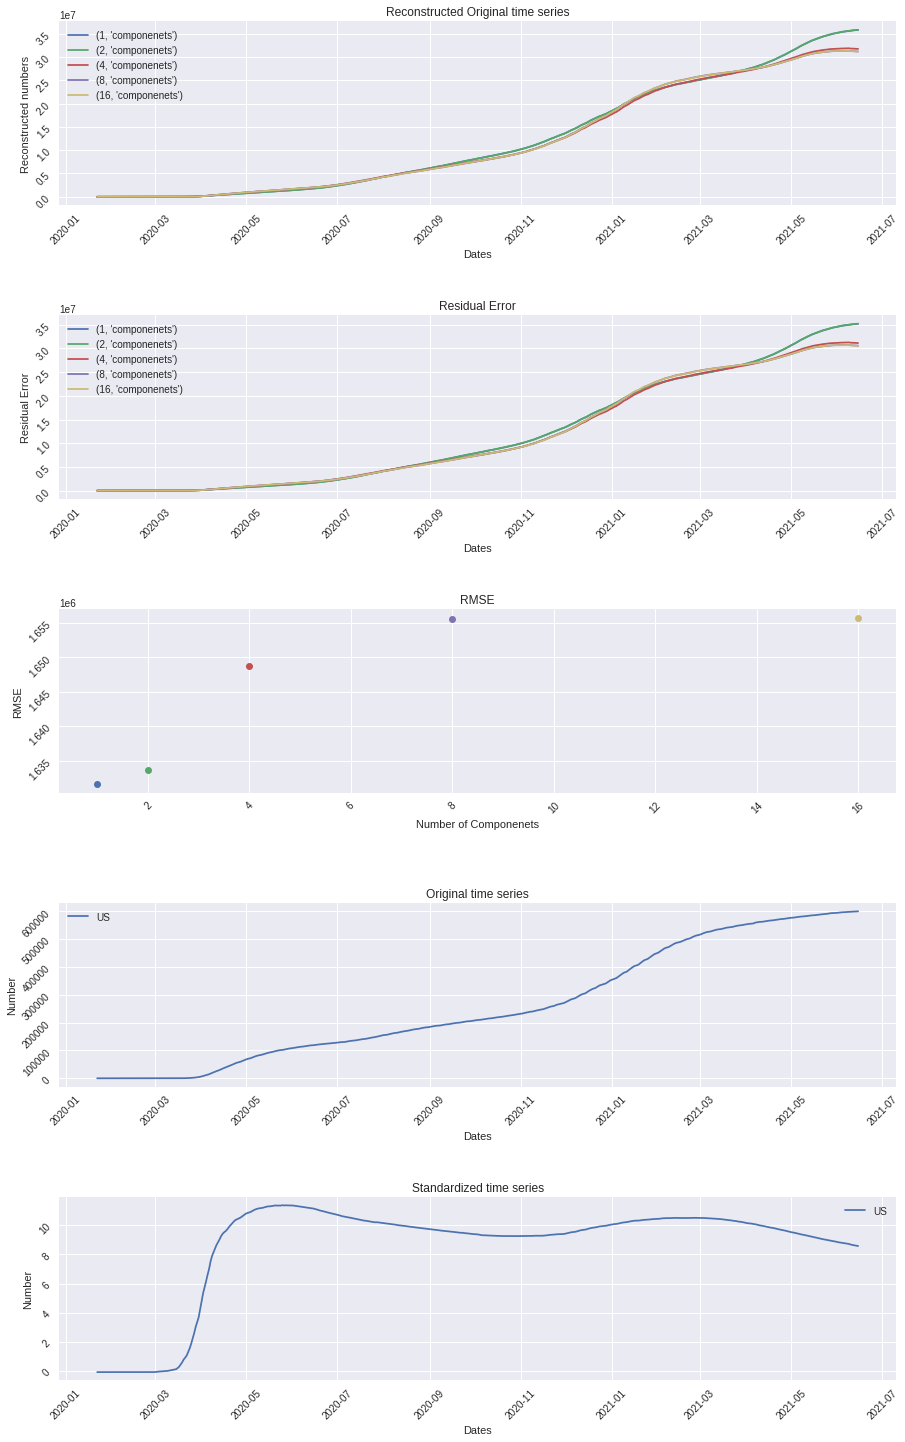

In [ ]:
plot_country_figures(death_raw, 'US')

[[ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 ...
 [-0.01599894 -0.01599894 -0.01599894 ...  1.00520833  1.0052049
   1.0051958 ]
 [-0.01601339 -0.01601339 -0.01601339 ...  1.0052049   1.00520833
   1.00520489]
 [-0.01602546 -0.01602546 -0.01602546 ...  1.0051958   1.00520489
   1.00520833]]


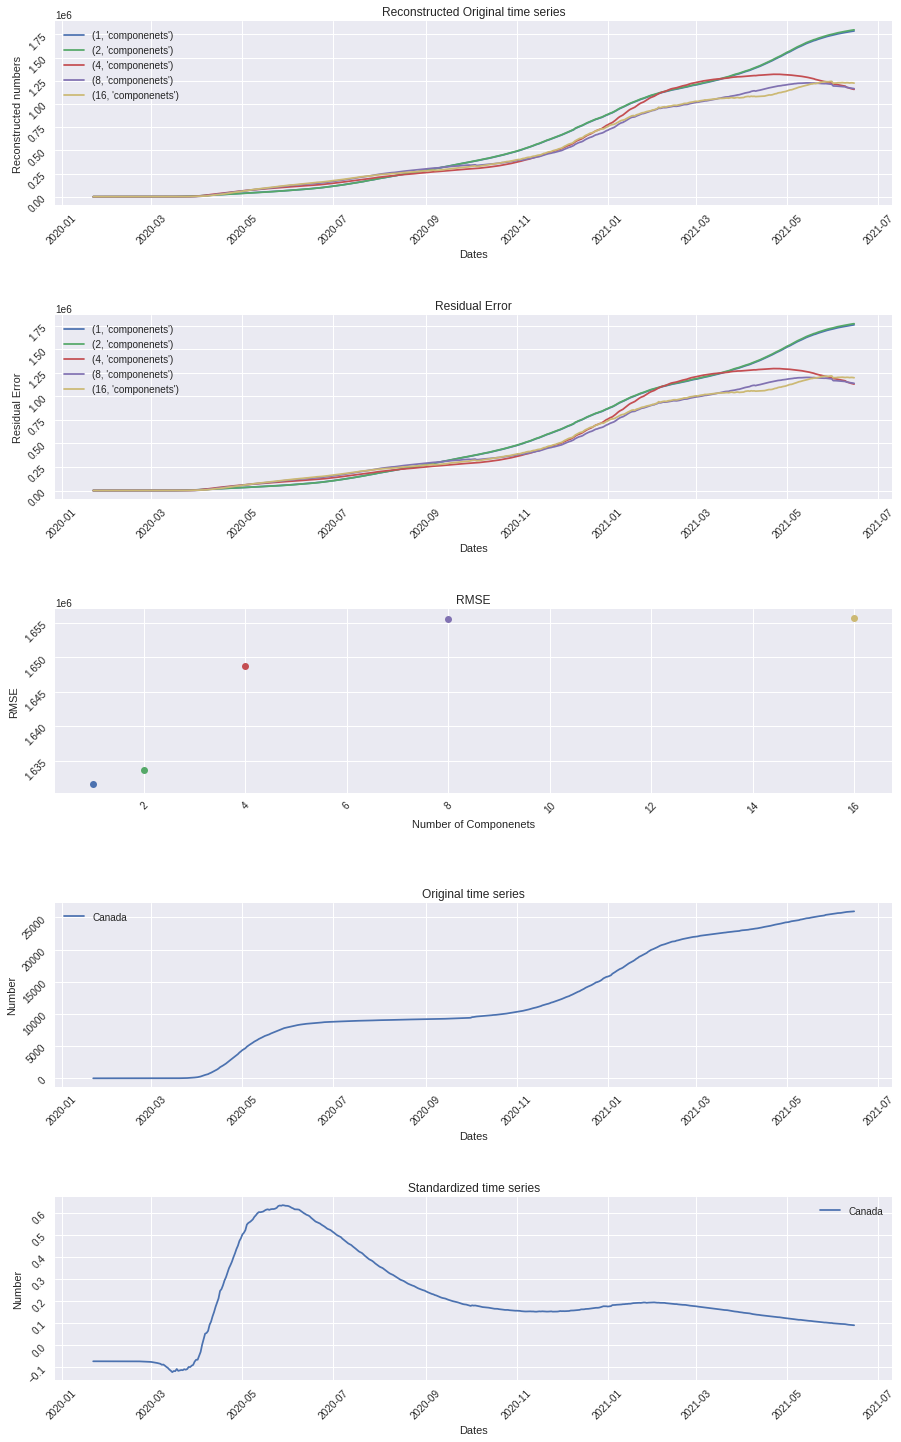

In [ ]:
plot_country_figures(death_raw, 'Canada')

[[ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 [ 1.00520833  1.00520833  1.00520833 ... -0.01599894 -0.01601339
  -0.01602546]
 ...
 [-0.01599894 -0.01599894 -0.01599894 ...  1.00520833  1.0052049
   1.0051958 ]
 [-0.01601339 -0.01601339 -0.01601339 ...  1.0052049   1.00520833
   1.00520489]
 [-0.01602546 -0.01602546 -0.01602546 ...  1.0051958   1.00520489
   1.00520833]]


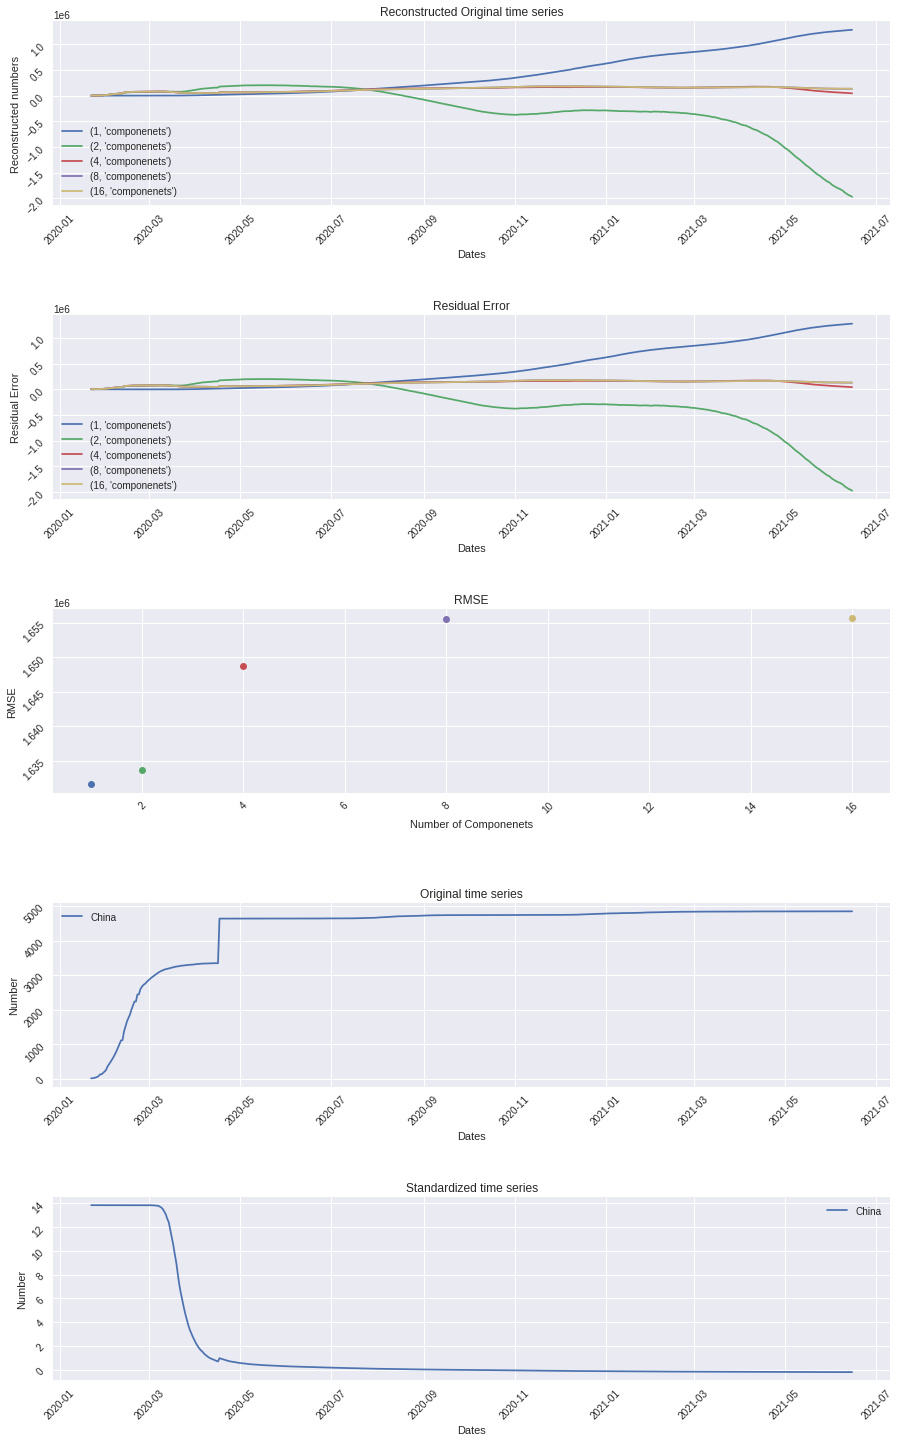

In [ ]:
plot_country_figures(death_raw, 'China')

# Part 5: PCA on the dimension of the samples [2 Marks]

Since the number of features (dates) in our dataset is greater than the number of samples (countries), we can apply PCA on the sample dimension for faster computation. 
Repeat part 4, where you apply PCA using this technique. Compare the results and report your findings. 

In [ ]:
def get_sorted_eigen_pt5(df):
  n, d = df.shape
  C = np.dot(df,df.T) / (n-1) # covariance matrix
  print(C)
  eigenValues, eigenVectors = np.linalg.eigh(C)
  eigenVectors = np.dot(df.T, eigenVectors)
  for i in range(n):
    eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
  
  idx = np.argsort(-eigenValues)
  eigenValues = eigenValues[idx]
  eigenVectors = eigenVectors[:, idx]
  return eigenValues, eigenVectors


def plot_country_figures_pt5(original_df, country_name): 
  #original_df=cases_raw
  #country_name='India'
  import matplotlib.pyplot as plt
  fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5)
  fig.set_figheight(25)
  fig.set_figwidth(15)
  fig.subplots_adjust(hspace=0.6, wspace=0.2)
  plt.style.use('seaborn')
  dates1=list(original_df.columns)
  dates=np.array(dates1)
  dates=pd.to_datetime(dates,format='%Y-%m-%d')


  #ax4.style.use('seaborn')
  ax4.plot(dates,original_df.loc[country_name],label=country_name)
  ax4.tick_params(labelrotation=45)
  ax4.set_title('Original time series')
  ax4.set_xlabel('Dates')
  ax4.set_ylabel('Number')
  ax4.legend()
  #plt.show()

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler().fit(original_df)
  original_df_scaled1 = scaler.transform(original_df)
  original_df_scaled=pd.DataFrame(original_df_scaled1,index=original_df.index,columns=original_df.columns)


  #ax5.style.use('seaborn')
  ax5.plot(dates,original_df_scaled.loc[country_name],label=country_name)
  ax5.tick_params(labelrotation=45)
  ax5.set_title('Standardized time series')
  ax5.set_xlabel('Dates')
  ax5.set_ylabel('Number')
  ax5.legend()

  eigenValues, eigenVectors=get_sorted_eigen_pt5(original_df_scaled)
  PC_count=[1,2,4,8,16]

  from sklearn.metrics import mean_squared_error
  for n in PC_count:
    
    W = eigenVectors[:, 0:n] #eigenvector 
    projX = np.dot(original_df_scaled, W)
    ReconX = np.dot(projX, W.T) 
    R_scaled=pd.DataFrame(data=ReconX,columns=dates,index=original_df_scaled.index)

    scaler = StandardScaler().fit(cases_raw)
    R_org1 = scaler.inverse_transform(ReconX)
    R_org=pd.DataFrame(R_org1,index=R_scaled.index,columns=R_scaled.columns)


    
    #fig.suptitle('Number of COVID-19 Cases', fontsize=25)
    
    #plt.plot(ReconX)
    ax1.plot(dates,R_org.loc[country_name],label=(n,'componenets'))
    ax1.tick_params(labelrotation=45)
    ax1.set_title('Reconstructed Original time series')
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Reconstructed numbers')
    ax1.legend()

    

    

    residual= R_org-original_df
    residualpd=pd.DataFrame(data=residual,columns=residual.columns,index=residual.index)

    ax2.plot(dates,residualpd.loc[country_name],label=(n,'componenets'))
    ax2.tick_params(labelrotation=45)
    ax2.set_title('Residual Error')
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('Residual Error')
    ax2.legend()

    

    rmse = mean_squared_error(original_df, R_org, squared=False)
    #rmse= ( (R_org-original_df)^2 )^(0.5)
    #rmsepd=pd.DataFrame(data=rmse,columns=R_org.columns,index=R_org.index)
    ax3.plot(n,rmse,marker="o")
    ax3.tick_params(labelrotation=45)
    ax3.set_title('RMSE')
    ax3.set_xlabel('Number of Componenets')
    ax3.set_ylabel('RMSE')


    
  

In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/death-june21.csv',
    index_col=0,
    thousands=','
)



[[0.10472263 0.11806434 0.09537008 ... 0.12110623 0.12351722 0.12303557]
 [0.11806434 0.13480601 0.1079086  ... 0.1373834  0.1406907  0.14038304]
 [0.09537008 0.1079086  0.08780797 ... 0.11067599 0.1129415  0.11248468]
 ...
 [0.12110623 0.1373834  0.11067599 ... 0.1406072  0.14363685 0.14316571]
 [0.12351722 0.1406907  0.1129415  ... 0.14363685 0.14696955 0.14658538]
 [0.12303557 0.14038304 0.11248468 ... 0.14316571 0.14658538 0.14626212]]


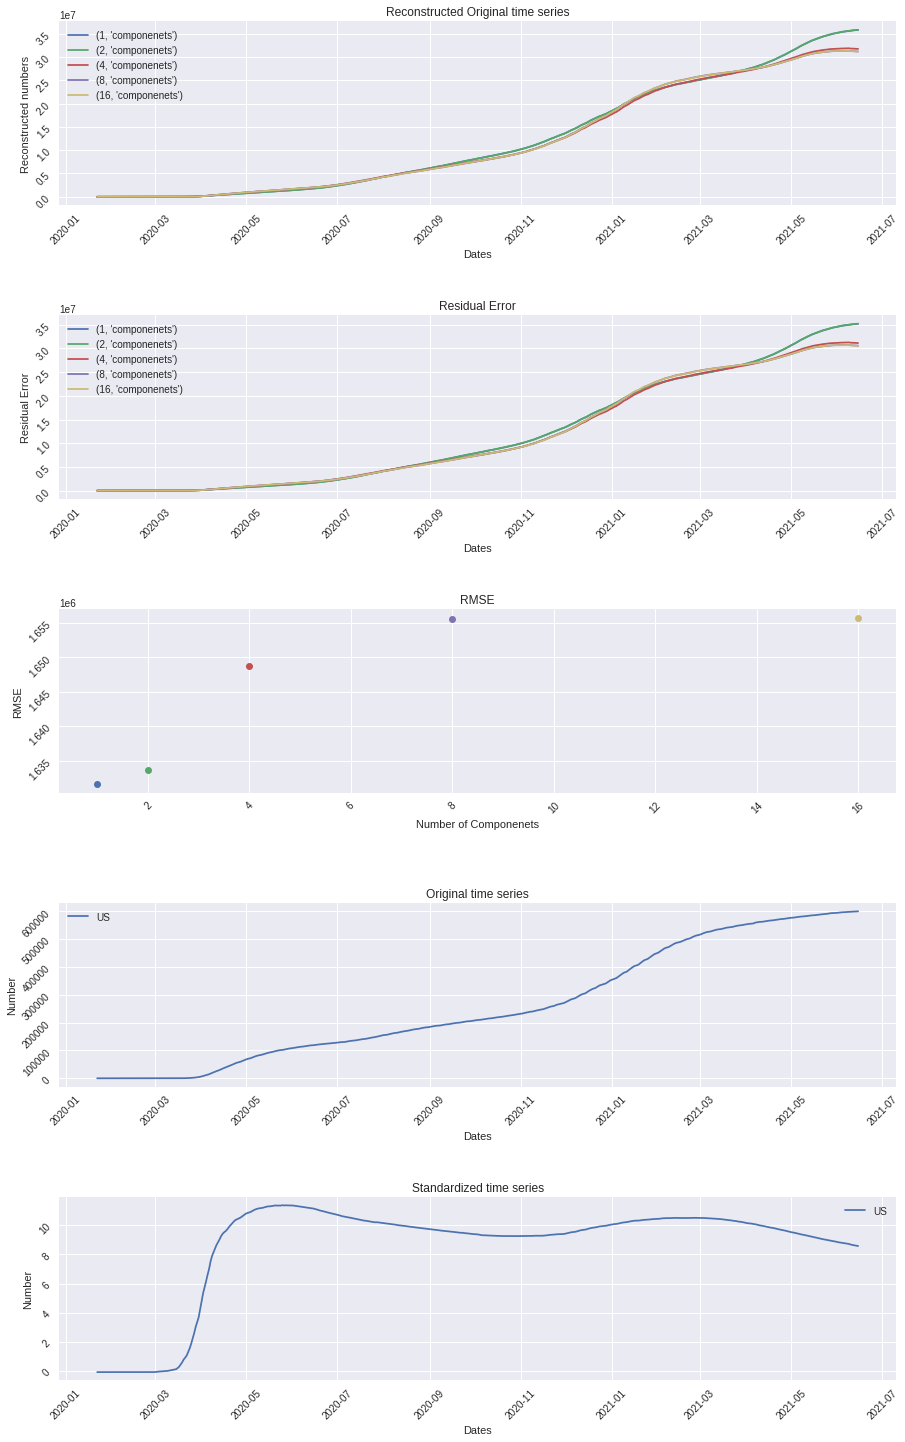

In [ ]:
plot_country_figures_pt5(death_raw, 'US')

[[0.10472263 0.11806434 0.09537008 ... 0.12110623 0.12351722 0.12303557]
 [0.11806434 0.13480601 0.1079086  ... 0.1373834  0.1406907  0.14038304]
 [0.09537008 0.1079086  0.08780797 ... 0.11067599 0.1129415  0.11248468]
 ...
 [0.12110623 0.1373834  0.11067599 ... 0.1406072  0.14363685 0.14316571]
 [0.12351722 0.1406907  0.1129415  ... 0.14363685 0.14696955 0.14658538]
 [0.12303557 0.14038304 0.11248468 ... 0.14316571 0.14658538 0.14626212]]


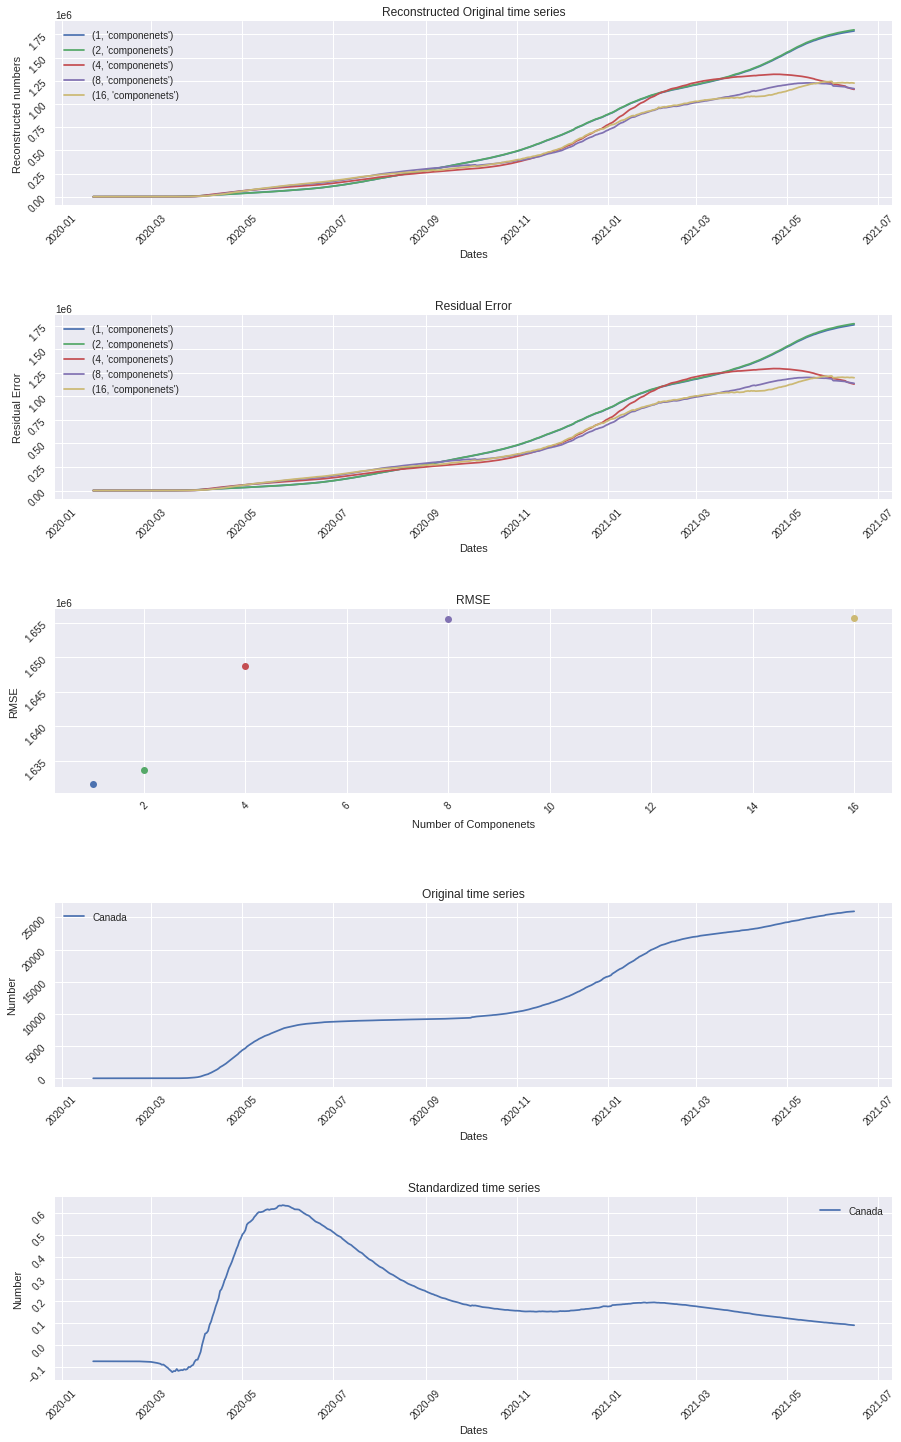

In [ ]:
plot_country_figures_pt5(death_raw, 'Canada')

[[0.10472263 0.11806434 0.09537008 ... 0.12110623 0.12351722 0.12303557]
 [0.11806434 0.13480601 0.1079086  ... 0.1373834  0.1406907  0.14038304]
 [0.09537008 0.1079086  0.08780797 ... 0.11067599 0.1129415  0.11248468]
 ...
 [0.12110623 0.1373834  0.11067599 ... 0.1406072  0.14363685 0.14316571]
 [0.12351722 0.1406907  0.1129415  ... 0.14363685 0.14696955 0.14658538]
 [0.12303557 0.14038304 0.11248468 ... 0.14316571 0.14658538 0.14626212]]


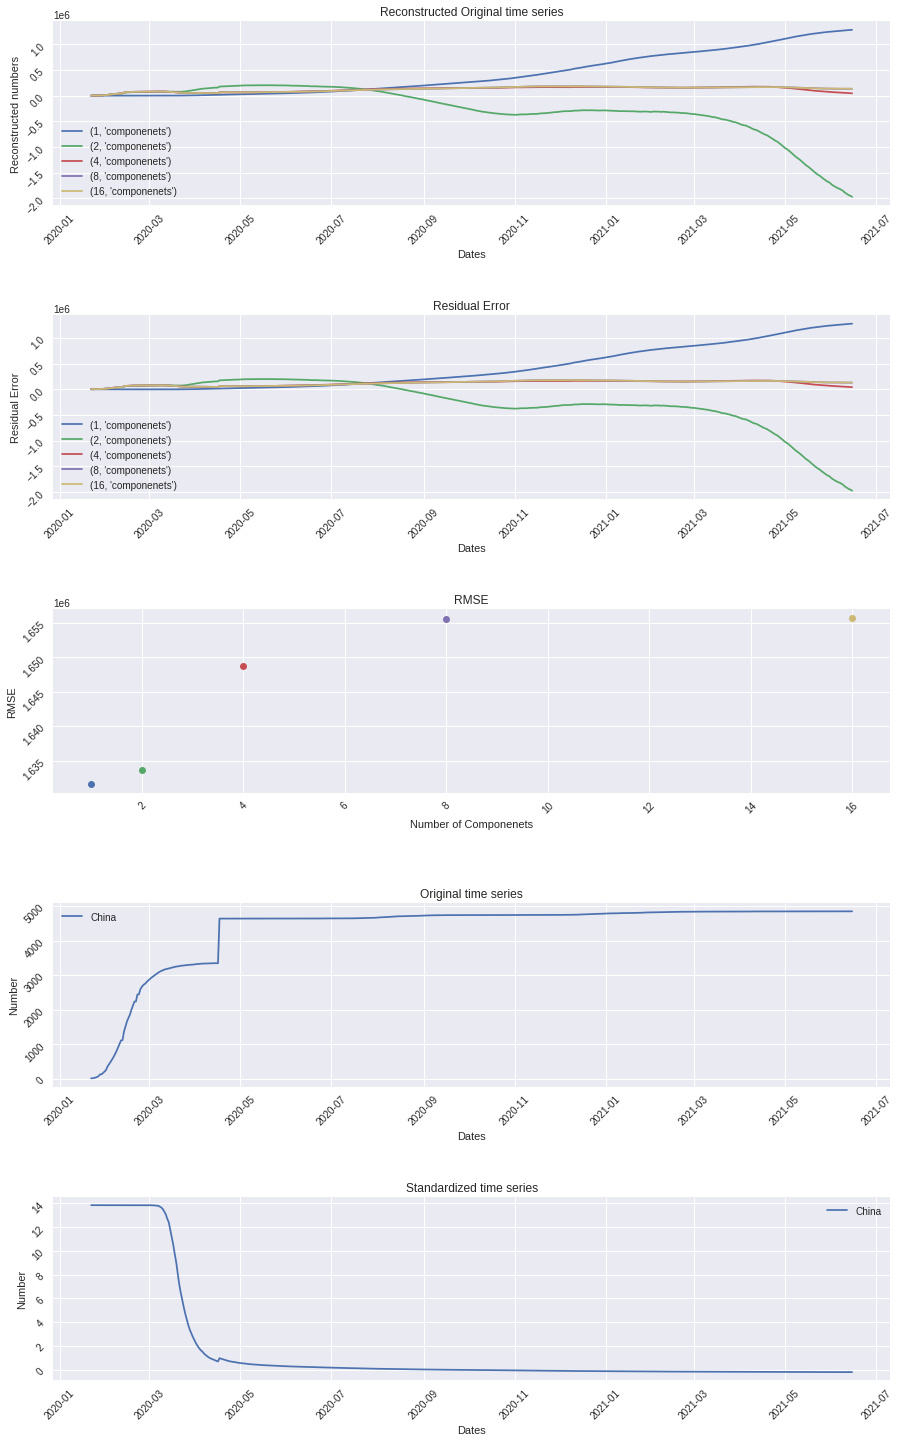

In [ ]:
plot_country_figures_pt5(death_raw, 'China')

It can be observed that by applying PCA on sample dimensions instead of feature dimensions, the resulting plots does not change at all. Moreover, the computation was faster as number of samples were less than number of features. Therefore, it improves the PCA analysis time while maintaining the results.

# Part 6: Fashion-MNIST dataset [3 Marks]


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [ ]:
import numpy as np
import pandas as pd
x.shape

(1000, 784)

In [ ]:
n1=[]
for n in range(1000):
  if y[n] == '5': #adding Sandal
    n1.append(n)
    #newdf=newdf.append(pd.DataFrame(data=x[n]))
  
  if y[n] == '7': #adding Sneaker
    n1.append(n)
    #newdf=newdf.append(pd.DataFrame(data=x[n]))
  
  if y[n] == '9': #adding Ankle boot
    n1.append(n)
    #newdf=newdf.append(pd.DataFrame(data=x[n]))


Items of similar types are added because it helps humans to find the number of principal components easily. If items which are very different are added in the dataset, it would be very difficult to decide the number of components for Principal Componenet Analysis. 

In [ ]:
n1=np.array(n1)
dfpt61=x[n1]

In [ ]:
dfpt6=pd.DataFrame(dfpt61) #newly formed dataframe

dfpt6l=dfpt6.to_numpy() #newly formed dataset in numpy array format
dfpt6

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,68.0,29.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,111.0,93.0,85.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,117.0,255.0,245.0,220.0,19.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.0,72.0,89.0,71.0,37.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,64.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
originalscaled=dfpt6-(dfpt6.mean(axis=0)) #standardization 
n, d = originalscaled.shape
originalscaled #standardized dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.031847,-0.009554,-0.095541,-0.589172,-1.238854,-1.700637,-1.751592,-1.83758,-2.121019,-1.977707,-1.792994,-1.987261,-2.261146,-2.66879,-2.901274,-0.875796,-0.136943,-0.009554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.047771,-0.022293,-0.732484,...,-1.984076,-2.449045,-3.703822,-4.328025,-4.980892,-6.859873,-10.019108,-11.140127,-9.955414,-11.671975,-5.035032,-0.452229,-0.019108,-0.022293,-0.006369,-0.009554,-0.152866,-0.687898,-1.585987,-3.105096,-4.477707,-5.544586,-5.971338,-5.522293,-3.824841,-1.958599,-0.687898,-0.640127,-0.633758,-0.605096,-0.742038,-0.796178,-0.926752,-1.968153,-3.843949,-4.031847,-3.621019,-3.894904,-0.582803,-0.003185
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.031847,-0.009554,-0.095541,-0.589172,-1.238854,-1.700637,-1.751592,-1.83758,-2.121019,-1.977707,-1.792994,-1.987261,-2.261146,-2.66879,-2.901274,-0.875796,-0.136943,-0.009554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.047771,-0.022293,-0.732484,...,-1.984076,-2.449045,-3.703822,-4.328025,-4.980892,-6.859873,-10.019108,-11.140127,-9.955414,-11.671975,-5.035032,-0.452229,-0.019108,-0.022293,-0.006369,-0.009554,-0.152866,-0.687898,-1.585987,-3.105096,-4.477707,-5.544586,-5.971338,-5.522293,-3.824841,-1.958599,-0.687898,-0.640127,-0.633758,-0.605096,-0.742038,-0.796178,-0.926752,-1.968153,-3.843949,-4.031847,-3.621019,-3.894904,-0.582803,-0.003185
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.031847,-0.009554,-0.095541,-0.589172,-1.238854,-1.700637,-1.751592,-1.83758,-2.121019,-1.977707,-1.792994,-1.987261,-2.261146,-2.66879,-2.901274,-0.875796,-0.136943,-0.009554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.047771,-0.022293,-0.732484,...,-1.984076,-2.449045,-3.703822,-4.328025,-4.980892,-6.859873,-10.019108,-11.140127,-9.955414,119.328025,-5.035032,-0.452229,-0.019108,-0.022293,-0.006369,-0.009554,-0.152866,-0.687898,-1.585987,-3.105096,-4.477707,-5.544586,-5.971338,-5.522293,-3.824841,-1.958599,-0.687898,-0.640127,-0.633758,-0.605096,-0.742038,-0.796178,-0.926752,-1.968153,-3.843949,-4.031847,-3.621019,-3.894904,-0.582803,-0.003185
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.031847,-0.009554,-0.095541,-0.589172,-1.238854,-1.700637,-1.751592,-1.83758,-2.121019,-1.977707,-1.792994,-1.987261,-2.261146,-2.66879,-2.901274,-0.875796,-0.136943,-0.009554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.047771,-0.022293,-0.732484,...,-1.984076,-2.449045,-3.703822,-4.328025,-4.980892,-5.859873,-10.019108,56.859873,19.044586,-11.671975,-2.035032,-0.452229,-0.019108,-0.022293,-0.006369,-0.009554,-0.152866,-0.687898,-1.585987,-3.105096,-4.477707,-5.544586,-5.971338,-5.522293,-3.824841,-1.958599,-0.687898,-0.640127,-0.633758,-0.605096,-0.742038,-0.796178,-0.926752,-1.968153,-3.843949,-4.031847,-3.621019,-3.894904,-0.582803,-0.003185
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.031847,-0.009554,-0.095541,-0.589172,-1.238854,37.299363,109.248408,91.16242,82.878981,25.022293,-1.792994,-1.987261,-2.261146,-2.66879,-2.901274,0.124204,-0.136943,-0.009554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.003185,-0.047771,-0.022293,0.267516,...,-1.984076,0.550955,-3.703822,112.671975,250.019108,238.140127,209.980892,7.859873,-9.955414,-7.671975,-5.035032,-0.452229,-0.019108,-0.022293,-0.006369,-0.009554,-0.152866,-0.687898,-1.585987,34.894904,67.522293,83.455414,65.028662,31.477707,-3.824841,-1.958599,-0.687898,-0.640127,-0.633758,2.394904,-0.742038,-0.796178,63.073248,40.031847,20.156051,-4.031847,-3.621019,-3.894904,-0.582803,-0.003185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
C1 = np.dot(originalscaled,originalscaled.T) / (n-1) # covariance matrix
eigenValues1, eigenVectors1 = np.linalg.eigh(C1)
eigenVectors1 = np.dot(originalscaled.T, eigenVectors1)
for i in range(n):
  eigenVectors1[:,i] = eigenVectors1[:, i] / np.linalg.norm(eigenVectors1[:, i])
C1.shape

(314, 314)

In [ ]:
idx = np.argsort(-eigenValues1)
eigenValues1 = eigenValues1[idx]
eigenVectors1 = eigenVectors1[:, idx]

In [ ]:
eigenVectors1.shape

(784, 314)

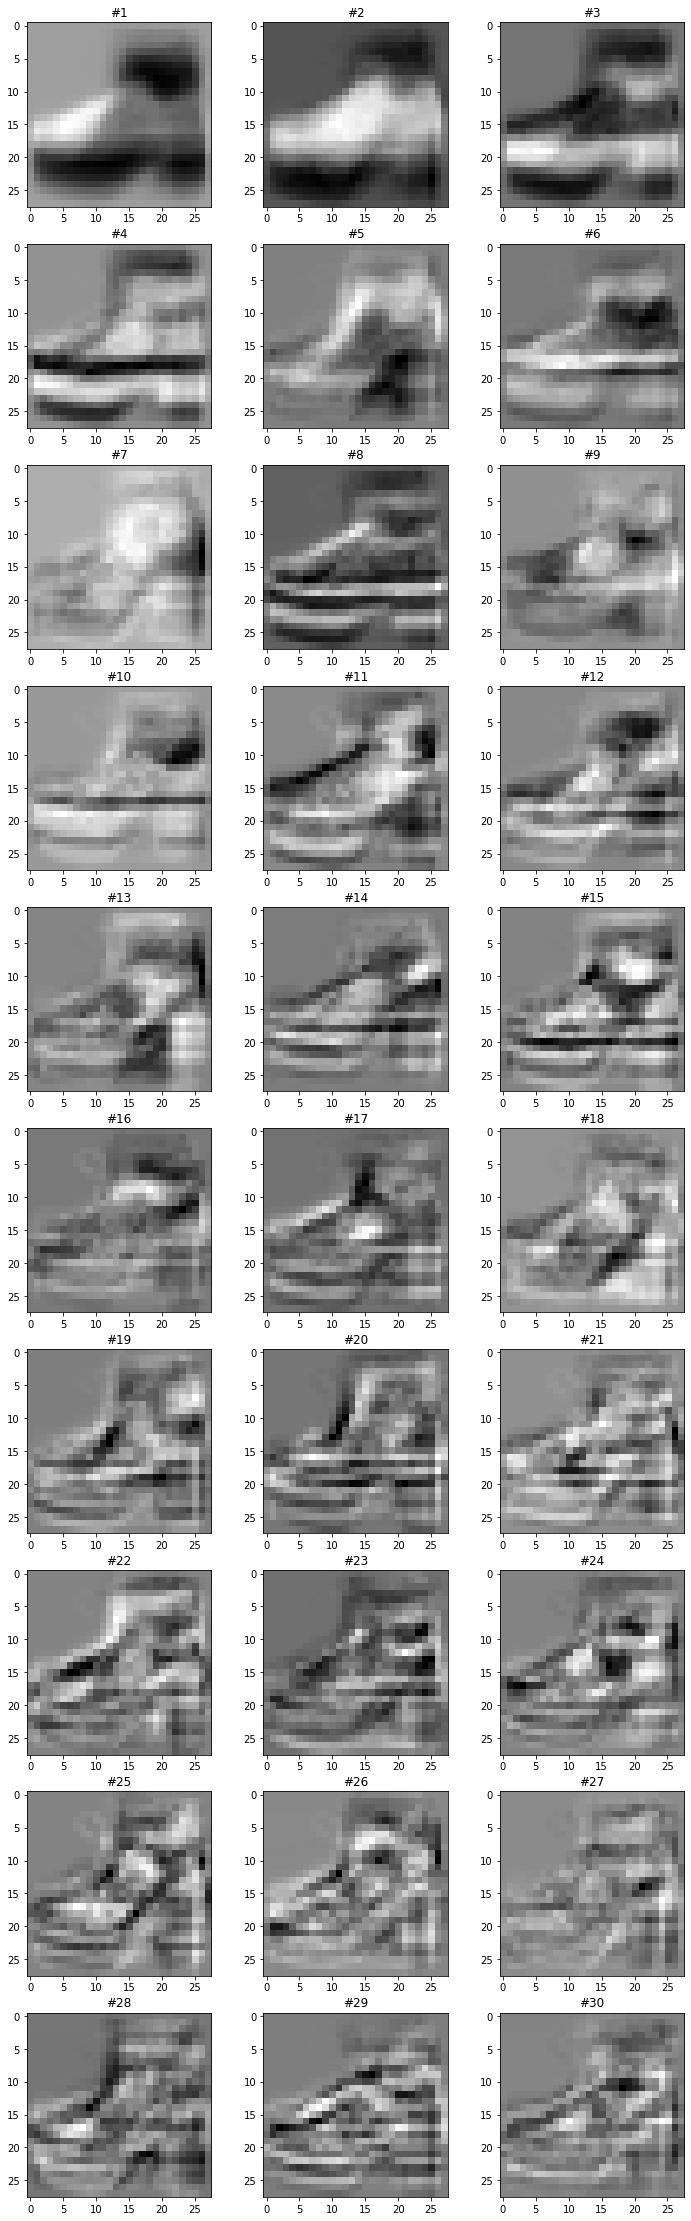

In [ ]:
# print first 10 eigen faces
import math
import matplotlib.pyplot as plt
COUNT = 30
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(eigenVectors1[:, i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

By plotting the first 10 Eigenvectors, it can be observed that the image becomes less recognizable and its quality decreases are the number of eigenvector increases. This is an expected observation as the Eigenvectors are sorted according to the eigenvalues and hence first Eigenvector has maximum variance and describes the dataset in best possible way.

In [ ]:
def recons(n):
  
  fig, (ax1,ax2)= plt.subplots(2)
  fig.set_figheight(5)
  fig.set_figwidth(5)
  fig.subplots_adjust(hspace=0.6, wspace=0.2)
  plt.style.use('seaborn')

  ax1.imshow(dfpt6l[313].reshape(28, 28), cmap=plt.cm.gray)
  ax1.set_title('Original Image')

  # create reconstructed images
  COUNT = n # count of first eigenVectors used to reconstruct the image
  reconImages = []
  for numEvs in range (1, COUNT+1):
    P = np.dot( dfpt6l[313].reshape(1, -1), eigenVectors1[:, 0:numEvs] ) #projection 

    R = np.dot ( P, eigenVectors1[:, 0:numEvs].T ) #reconstruction
    reconImages.append(R.reshape(28, 28) )

  for i in range(0, COUNT):

    ax2.imshow(reconImages[i], cmap = plt.cm.gray) #reconstructed image print

  ax2.set_title('Reconstructed Image')

  print('Number of components used:',n)





Number of components used: 20


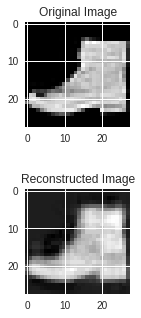

In [ ]:
recons(20) #based on visual judgement, 20 components were used

**Compression Ratio**

The dataset has 1000 samples and 784 features for each sample: X: (1000, 784). Total elements of the dataset : 784,000

Based on visual judgement, 20 Principal Components were chosen to identify the item of the dataset. Therefore, the full-scale eigenvector was compressed to W_op= [784,20] . The Projection matrix size was [1000,20] . The mean face matrix size is [28,28]. Adding Principal Components, projection matrix and mean face gives total of 36464 elements for reconstruction. Therefore, the compression ratio is 784,000/36464 = **21.5** .  Therefore, the original dataset was compressed 21.5 times but still was describable .

# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


Fashion-MNIST:

1. https://www.openml.org/d/40996

2. https://github.com/zalandoresearch/fashion-mnist